Dataset-https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Heart Disease 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Variables

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)


# Data Understanding

Importing the necessary libraries

**Libraries**

numpy -> for numerical calculations

matplotlib.pyplot -> for data visualization

pandas -> for reading csv file and processing it

seaborn -> for data visualization

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_datasets = "/content/drive/MyDrive/heart.csv"

In [ ]:
# Reading the dataset
datasets = pd.read_csv(path_datasets)

In [ ]:
# Checking the shape of the dataset
datasets.shape 

(303, 14)

In [ ]:
# Checking the first 5 rows
datasets.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking the information of the datasets
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 2. Data Analysis

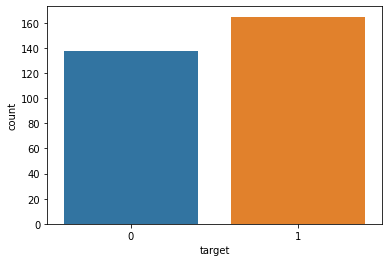

In [ ]:
# Plotting count plot of target
sns.countplot(x="target", data=datasets)

Here's the graphical representation between the relationship of variable target and datasets. 

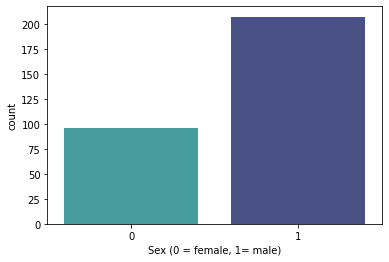

In [ ]:
# Plotting count plot of Sex
sns.countplot(x='sex', data=datasets, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

Here's the graphical representation between the relationship of variable Sex and datasets.(0 = Female and 1 = Male)

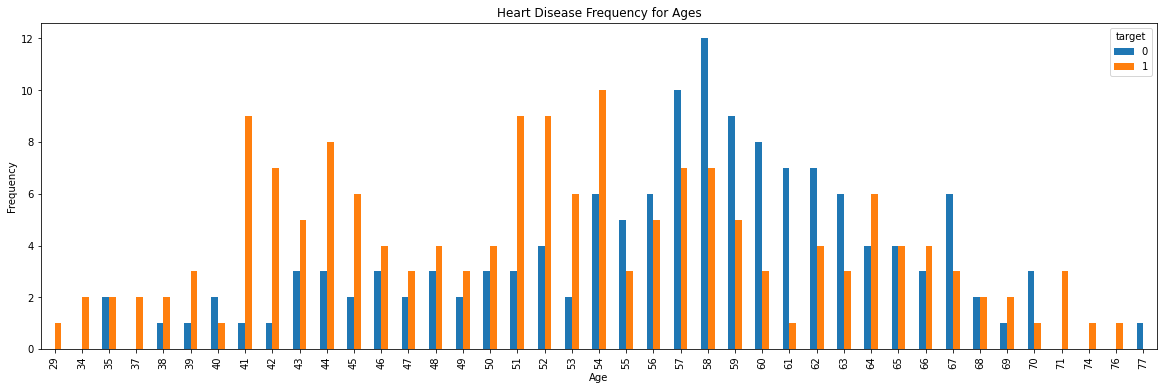

In [ ]:

#Plotting heart disease frequency for age
pd.crosstab(datasets.age,datasets.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show() 

Here is the graphical represention of frequencies of age having the heart disease.

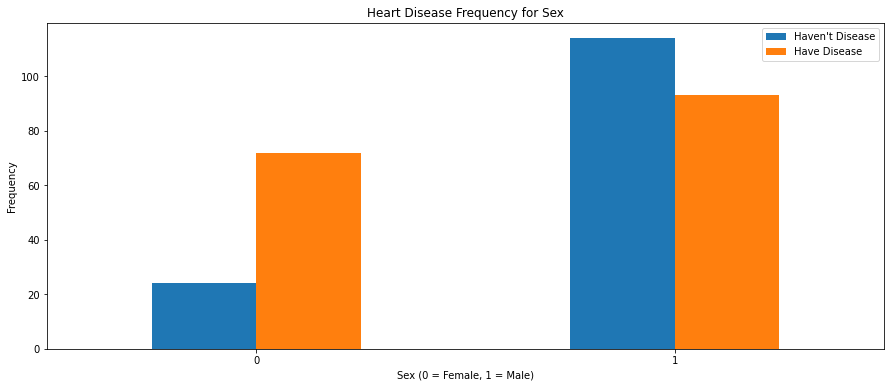

In [ ]:
#Plotting heart disease frequency for sex
pd.crosstab(datasets.sex,datasets.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Here is the graphical represention of frequencies of sex having the heart disease.

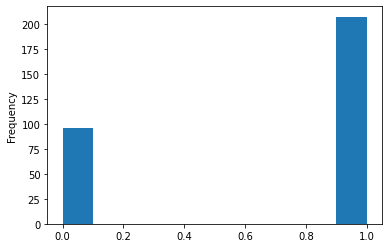

In [ ]:
# Plotting the bar plot of sex
datasets['sex'].plot.hist()

Here are the number of male and female in dataset(0=female and 1= male)

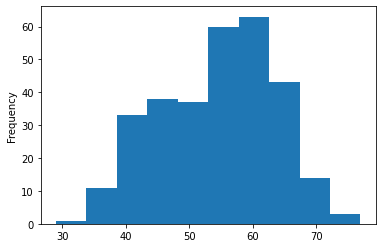

In [ ]:
# Plotting the bar plot of Age
datasets['age'].plot.hist()

Here are the number of age containg in this dataset.

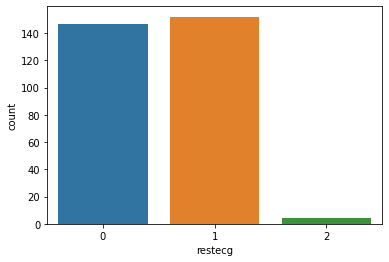

In [ ]:
# Plotting count plot of restecg
sns.countplot(x='restecg', data=datasets)

Here are the  results of resting electrocardiographic.

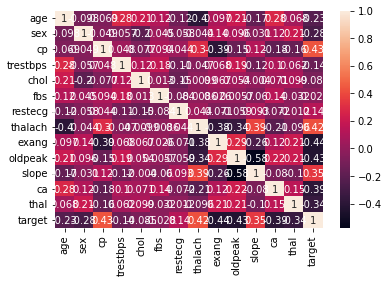

In [ ]:
# Plots the heat map of the correlation of the datas
sns.heatmap(datasets.corr(),annot=True)

Here's the heat map of 

# 3. Data Cleaning Manipulation

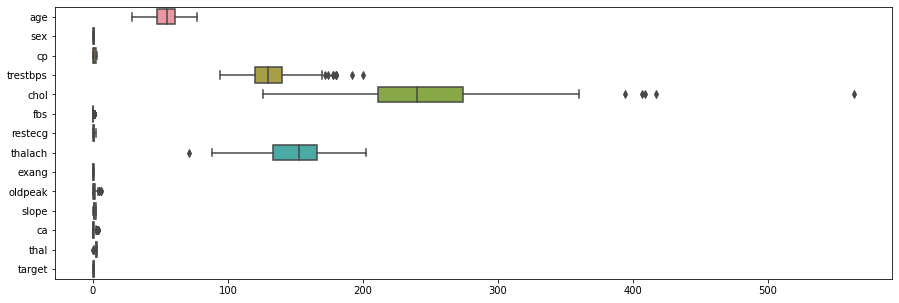

In [ ]:
# Removing Outliers from the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data=datasets,orient='h')

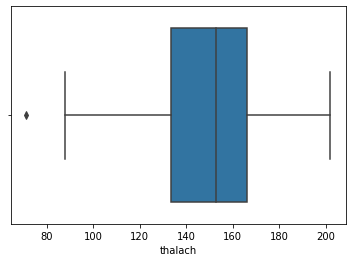

In [ ]:
q1 = datasets.thalach.quantile(0.25)
q3 = datasets.thalach.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
k1=datasets[datasets["thalach"] < lower_limit]
data2=datasets[datasets["thalach"] > lower_limit]
sns.boxplot(datasets["thalach"])

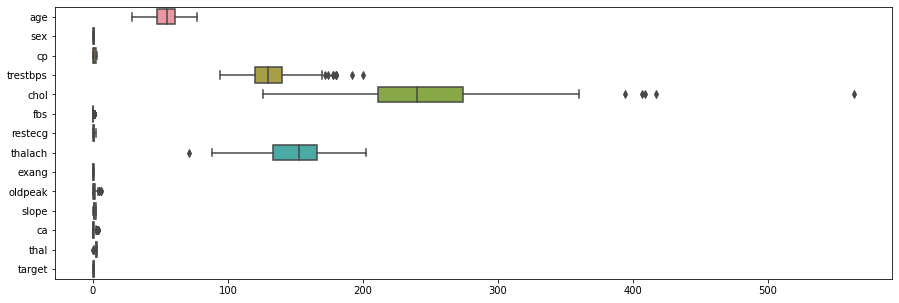

In [ ]:
# Removing Outliers from the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data=datasets,orient='h')

In [ ]:
#dropping data
x = datasets.drop('target',axis=1)
y = datasets['target']

Dropping the Dataset target


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=42)

In [ ]:
datasets.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
datasets.shape

(303, 14)

In [ ]:
x_test = scaler.transform(x_test)
x_test

array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

# 4.Classification Task

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(7)

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1


In [ ]:
# Y Prediction
y_pred = lr.predict(x_test)

In [ ]:
# Using confusion_matrix
# Determining true positive, true negative, false positive and also false negative.
from sklearn.metrics import confusion_matrix
confusionMatrix=confusion_matrix(y_test,y_pred)
confusionMatrix

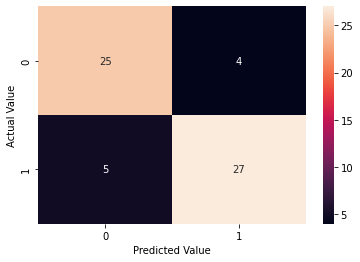

In [ ]:
# Plotting heat map of Confusion Matrix
sns.heatmap(confusionMatrix,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

The confusion matrix shows 25+27 = 52 correct predictions and 5+4= 9 incorrect ones.

True Positives: 27

True Negatives: 25

False Positives: 4 (Type I error)

False Negatives: 5 ( Type II error)

In [ ]:
# Calculating the total value of precision, recall, 
# f-1 score, accuracy , macro avg and also weighted avg
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

85.24590163934425

# 5. AUC-ROC Curve

In [ ]:
from sklearn.metrics import auc,roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from itertools import cycle

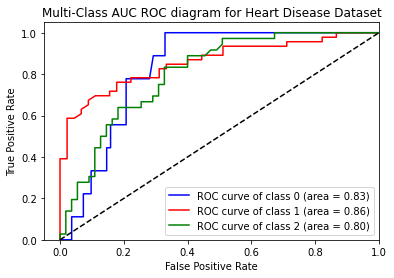

In [ ]:
X = datasets[['age','sex','oldpeak']]
y = datasets['thal']
y = label_binarize(y,classes=[1,2,3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=1))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Multi-Class AUC ROC diagram for Heart Disease Dataset')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds